In [134]:
##Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from itertools import permutations, chain, cycle
import re
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from scipy.linalg import svd
import scipy.cluster.hierarchy as shc
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.spatial.distance import cdist 

In [59]:
##biochar elements dataset from UC Davis Chemistry Lab

df= pd.read_csv('biochar_elements.csv', sep= ',')
df.head(5)

,Biochar Name,Feedstock Composition,Optional comments about Feedstock,Commercial,Geographic Region,Manufacturer,Pyrolysis Method,Source: Peer Reviewed Publication,Reference,Moisture (%),...,Method Summary/Reference.1,Extractable P (mg/kg),Total P (mg/kg),Calcium (mg/kg),Magnesium (mg/kg),Potassium (mg/kg),Aluminum (mg/kg),Iron (mg/kg),Elemental extraction method,Unnamed: 52
0,Cladophora coelothrix1,Algae,NaN,Non commercial,NaN,NaN,NaN,Yes,"Mutanda et al., Bioresource Technology, 102, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cladophora patentiramea1,Algae,NaN,Non commercial,NaN,NaN,NaN,Yes,"Mutanda et al., Bioresource Technology, 102, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chaetomorpha indica1,Algae,NaN,Non commercial,NaN,NaN,NaN,Yes,"Mutanda et al., Bioresource Technology, 102, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chaetomorpha linum1,Algae,NaN,Non commercial,NaN,NaN,NaN,Yes,"Mutanda et al., Bioresource Technology, 102, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cladophoropsis sp.1,Algae,NaN,Non commercial,NaN,NaN,NaN,Yes,"Mutanda et al., Bioresource Technology, 102, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
## create a function to clean names of the dataframe so that it is 
## easier to work with the column names

def clean_names(df):
    # remove any leading/trailing whitespace and lowercase all column names
    df.columns = df.columns.str.strip().str.lower()
    
    # replace any non-word characters (excluding underscores) with underscores
    df.columns = df.columns.map(lambda x: re.sub(r'\W+', '_', x))
    
    # replace multiple underscores with a single underscore
    df.columns = df.columns.map(lambda x: re.sub(r'_{2,}', '_', x))
    
    # return cleaned DataFrame
    return df

df= clean_names(df)
df.columns

Index(['biochar_name', 'feedstock_composition',
       'optional_comments_about_feedstock', 'commercial', 'geographic_region',
       'manufacturer', 'pyrolysis_method', 'source_peer_reviewed_publication',
       'reference', 'moisture_', 'temperature_c_', 'total_ash_content_',
       'c_organic_', 'total_c_used_in_plot', 'total_n_', 'h_', 'o_', 'ph',
       'ec_ds_m_', 'mean_particle_size_mm_', 'germination_inhibition',
       'polycylic_aromatic_hydrocarbons_mg_kg_', 'dioxin_furan_mg_kg_',
       'polychlorinated_biphenyls_mg_kg_', 'arsenic_mg_kg_', 'cadmium_mg_kg_',
       'chromium_mg_kg_', 'cobalt_mg_kg_', 'copper_mg_kg_', 'lead_mg_kg_',
       'molybdenum_mg_kg_', 'mercury_mg_kg_', 'nickel_mg_kg_',
       'selenium_mg_kg_', 'zinc_mg_kg_', 'boron_mg_kg_', 'chlorine_mg_kg_',
       'sodium_mg_kg_', 'previous_page', 'cation_exchange_capacity_cmolc_kg_',
       'method_summary_reference', 'volatile_matter_',
       'total_surface_area_m2_g_', 'method_summary_reference_1',
       'ext

In [61]:
## Let's check the data shape
df.shape

(1177, 53)

In [62]:
## Check for Null values
print(df.isnull().sum())

## Check information of the data types
print(df.dtypes)

biochar_name                                 0
feedstock_composition                        0
optional_comments_about_feedstock          441
commercial                                   0
geographic_region                          949
manufacturer                              1113
pyrolysis_method                           380
source_peer_reviewed_publication             9
reference                                    1
moisture_                                 1027
temperature_c_                              28
total_ash_content_                         292
c_organic_                                1035
total_c_used_in_plot                       131
total_n_                                   199
h_                                         398
o_                                         480
ph                                         521
ec_ds_m_                                   916
mean_particle_size_mm_                    1166
germination_inhibition                    1175
polycylic_aro

In [63]:
# remove columns with null values less than half of the rows
df = df.dropna(axis=1, thresh=df.shape[0]/2)

# view the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   biochar_name                       1177 non-null   object 
 1   feedstock_composition              1177 non-null   object 
 2   optional_comments_about_feedstock  736 non-null    object 
 3   commercial                         1177 non-null   object 
 4   pyrolysis_method                   797 non-null    object 
 5   source_peer_reviewed_publication   1168 non-null   object 
 6   reference                          1176 non-null   object 
 7   temperature_c_                     1149 non-null   float64
 8   total_ash_content_                 885 non-null    float64
 9   total_c_used_in_plot               1046 non-null   float64
 10  total_n_                           978 non-null    float64
 11  h_                                 779 non-null    float

[[<AxesSubplot:title={'center':'temperature_c_'}>
  <AxesSubplot:title={'center':'total_ash_content_'}>
  <AxesSubplot:title={'center':'total_c_used_in_plot'}>]
 [<AxesSubplot:title={'center':'total_n_'}>
  <AxesSubplot:title={'center':'h_'}> <AxesSubplot:title={'center':'o_'}>]
 [<AxesSubplot:title={'center':'ph'}> <AxesSubplot:> <AxesSubplot:>]]


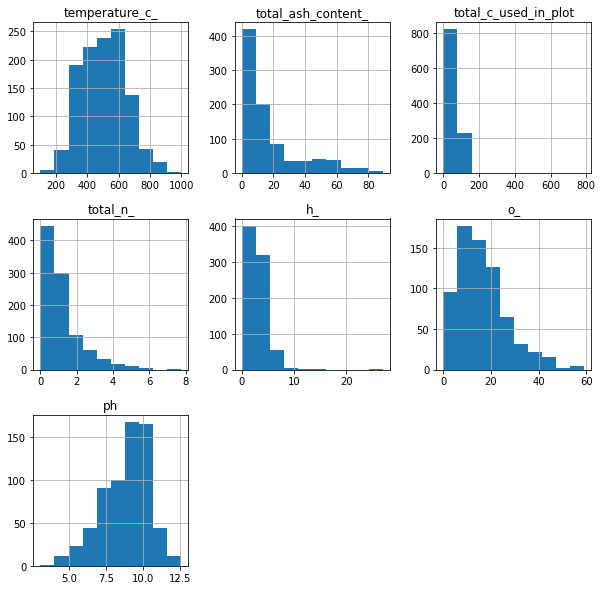

In [64]:
##Plot and visualize histogram of each column in the dataframe
dfhistall= df.hist(bins=10, figsize= (10,10))
print(dfhistall)

In [65]:
## Check unique values in all object type columns:

# create a new DataFrame to store unique values
uni_df = pd.DataFrame(columns=['Column Name', 'Unique Values', 'Value Count'])

# loop through columns with object data type and store unique values in new DataFrame
for column in df.select_dtypes(include=['object']):
    unique_values = df[column].unique()
    value_count = len(unique_values)
    uni_df = uni_df.append({'Column Name': column, 'Unique Values': unique_values, 'Value Count': value_count}, ignore_index=True)

# display new DataFrame
##print(unique_values_df)
uni_df


,Column Name,Unique Values,Value Count
0,biochar_name,"[Cladophora coelothrix1, Cladophora patentiram...",1008
1,feedstock_composition,"[Algae, Grass, Corn stover, Hull, Manure, Othe...",13
2,optional_comments_about_feedstock,"[nan, Swine Manure, Green Waste, Switchgrass, ...",298
3,commercial,"[Non commercial, Commercial]",2
4,pyrolysis_method,"[nan, low temperature carbonization , fast pyr...",104
5,source_peer_reviewed_publication,"[Yes, No, nan]",3
6,reference,"[Mutanda et al., Bioresource Technology, 102,...",262


In [66]:
##Read the second data frame "Biochar Properties"

df_char= clean_names(pd.read_csv('Biochar Properties.csv', sep= ','))
df_char.head(5)

,sample_id,name,replicate,feedstock,productionmethod,productiontemp,biochargroup,d13c,c,h,...,inorg_c,npoc,tdn,weoc_tdn,no3n,nh4n,poxc,cec,cmin_101_willamette,cmin_101_chehalis
0,2569,WS,1,Wheat straw (Triticum aestivum),Gasification,above 1250,Combustion,NaN,55.36,1.13,...,96.1,840,21.0,39991,0.0,0.78,0.82,NaN,NaN,NaN
1,2569,WS,2,Wheat straw (Triticum aestivum),Gasification,above 1250,Combustion,NaN,56.52,1.16,...,88.1,851,21.1,40284,0.0,0.11,0.79,NaN,NaN,NaN
2,2569,WS,3,Wheat straw (Triticum aestivum),Gasification,above 1250,Combustion,NaN,56.06,1.11,...,86.2,847,15.1,56096,0.0,0.24,0.76,NaN,NaN,NaN
3,2570,CW,1,Mixed conifer wood,Gasification,above 1250,Combustion,NaN,79.65,0.51,...,22.9,291,1.7,172763,0.0,0.59,2.04,198.071429,NaN,NaN
4,2570,CW,2,Mixed conifer wood,Gasification,above 1250,Combustion,NaN,79.81,0.67,...,23.7,283,3.1,91338,0.0,0.53,2.15,199.309524,NaN,NaN


In [67]:
print(df_char.shape)

(30, 37)


In [68]:
##Read in the xperiemtal data that consists of the data from N

df_exp= clean_names(pd.read_csv('Experiment 2 Timeseries.csv', sep= ','))
df_exp.head(5)

,sample_id,name,replicate,feedstock,productionmethod,productiontemp,biochargroup,day0_no3n,day0_nh4n,day14_no3,day14_nh4,day28_no3,day28_nh4,day14_nmin,day28_nmin,delta_day14_nmin,delta_day28_nmin
0,2569,WS,1,Wheat straw (Triticum aestivum),Gasification,above 1250,Combustion,5.12,2.26,13.35,0.94,23.20,2.12,6.90,17.93,5.00,7.46
1,2569,WS,2,Wheat straw (Triticum aestivum),Gasification,above 1250,Combustion,5.09,2.18,14.25,1.53,23.19,2.19,8.51,18.11,6.61,7.64
2,2569,WS,3,Wheat straw (Triticum aestivum),Gasification,above 1250,Combustion,5.03,2.37,13.28,1.59,21.30,1.26,7.47,15.15,5.57,4.68
3,2570,CW,1,Mixed conifer wood,Gasification,above 1250,Combustion,5.05,1.91,14.85,1.41,23.52,1.14,9.29,17.70,7.39,7.23
4,2570,CW,2,Mixed conifer wood,Gasification,above 1250,Combustion,5.13,2.24,13.79,1.64,21.28,1.24,8.07,15.15,6.17,4.68


In [69]:
print(df_exp.shape)

(30, 17)


In [70]:
##Merge the biochar characteristics/properties data with the experimental data
##so we include the delta day N data with the properties data

merdf=  pd.merge(df_char,df_exp)
##merdf.head(5)

##check columns
merdf.columns

Index(['sample_id', 'name', 'replicate', 'feedstock', 'productionmethod',
       'productiontemp', 'biochargroup', 'd13c', 'c', 'h', 'n', 's', 'ash',
       'o', 'htoc_mass', 'cton_mass', 'htoc_atomic', 'cton_atomic', 'ph', 'ec',
       'caco3eq', 'ext_ca', 'ext_k', 'ext_mg', 'ext_na', 'ext_s', 'ext_p',
       'inorg_c', 'npoc', 'tdn', 'weoc_tdn', 'no3n', 'nh4n', 'poxc', 'cec',
       'cmin_101_willamette', 'cmin_101_chehalis', 'day0_no3n', 'day0_nh4n',
       'day14_no3', 'day14_nh4', 'day28_no3', 'day28_nh4', 'day14_nmin',
       'day28_nmin', 'delta_day14_nmin', 'delta_day28_nmin'],
      dtype='object')

In [71]:
##Now select only specific columns from the merged dataframe merfdf
subdf= merdf[['feedstock','ash', 'c', 'n', 
              'h', 'o', 'ph', 
              'delta_day14_nmin', 'delta_day28_nmin']]
subdf.columns

##look at feedstock type
subdf['feedstock'].unique()

array(['Wheat straw (Triticum aestivum)', 'Mixed conifer wood',
       'Juniper (Juniperus occidentalis)',
       'Barley plants (Hordeum vulgare)', 'Poultry litter',
       'Grape wood (vitis vinifera)'], dtype=object)

In [72]:
##look at feedstock decomp type. This is to see how we can connect the biochar characteristics 
##and the biochar merged experimental data together
df['feedstock_composition'].unique()

array(['Algae', 'Grass', 'Corn stover', 'Hull', 'Manure', 'Other',
       'Nutshell', 'Soft Wood', 'Wood', 'Hard Wood', 'Pomace',
       'Other/ Mixed', 'Sludge'], dtype=object)

In [73]:
## replace the feedstock in subdf with the same names that are exactly or close 
## to the name categories from 'feedsotck_compositon' in the biochar df
rep_dict= {'Wheat straw (Triticum aestivum)': 'Grass', 
           'Mixed conifer wood': 'Soft Wood',
           'Juniper (Juniperus occidentalis)': 'Other' ,
           'Barley plants (Hordeum vulgare)': 'Grass', 
           'Poultry litter': 'Manure',
           'Grape wood (vitis vinifera)': 'Hard Wood'}

subdf_repl= subdf 
subdf_repl['feedstock'] = subdf['feedstock'].replace(rep_dict)

##subdf_repl['feedstock'].unique()
subdf_repl.head(15)

,feedstock,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,Grass,51.300,55.360,0.670,1.130,NaN,10.790,5.00,7.46
1,Grass,NaN,56.520,0.670,1.160,NaN,10.830,6.61,7.64
2,Grass,NaN,56.060,0.640,1.110,NaN,10.880,5.57,4.68
3,Soft Wood,6.070,79.650,0.380,0.510,NaN,9.590,7.39,7.23
4,Soft Wood,5.410,79.810,0.380,0.670,NaN,9.690,6.17,4.68
5,Soft Wood,4.660,79.650,0.370,0.790,NaN,9.710,5.73,3.88
6,Other,19.460,81.060,0.570,1.330,NaN,8.060,4.74,9.02
7,Other,NaN,81.830,0.520,1.240,NaN,8.050,5.10,12.68
8,Other,16.700,88.780,0.610,1.660,NaN,8.160,6.53,12.81
9,Grass,14.082,65.488,1.178,4.786,14.130,10.148,0.74,7.73


In [74]:
df.columns

Index(['biochar_name', 'feedstock_composition',
       'optional_comments_about_feedstock', 'commercial', 'pyrolysis_method',
       'source_peer_reviewed_publication', 'reference', 'temperature_c_',
       'total_ash_content_', 'total_c_used_in_plot', 'total_n_', 'h_', 'o_',
       'ph'],
      dtype='object')

In [75]:
# Rename the columns
df_named = df.rename(columns={'feedstock_composition': 'feedstock', 'total_ash_content_': 'ash',
                        'total_c_used_in_plot': 'c', 'total_n_': 'n',
                        'h_': 'h', 'o_': 'o',
                        'ph': 'ph' })

## select certain columns
dfed= df_named[['feedstock','ash', 'c', 'n', 
              'h', 'o', 'ph']]
dfed.columns

Index(['feedstock', 'ash', 'c', 'n', 'h', 'o', 'ph'], dtype='object')

In [76]:
dfed.head(10)

,feedstock,ash,c,n,h,o,ph
0,Algae,32.1,34.6,3.30,1.50,NaN,8.72
1,Algae,47.0,20.3,1.70,1.50,NaN,9.12
2,Algae,73.5,10.2,1.10,0.80,NaN,7.83
3,Algae,16.0,23.6,2.40,1.30,NaN,9.61
4,Algae,46.5,23.6,2.80,1.50,NaN,10.07
5,Algae,20.9,24.8,2.40,1.20,NaN,9.65
6,Algae,54.2,21.8,2.00,1.20,NaN,9.87
7,Grass,6.9,48.6,0.64,7.25,44.1,NaN
8,Grass,19.2,58.6,1.24,3.47,22.7,NaN
9,Grass,NaN,69.2,NaN,3.20,26.6,NaN


In [77]:
subdf_repl.head(10)

,feedstock,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,Grass,51.300,55.360,0.670,1.130,NaN,10.790,5.00,7.46
1,Grass,NaN,56.520,0.670,1.160,NaN,10.830,6.61,7.64
2,Grass,NaN,56.060,0.640,1.110,NaN,10.880,5.57,4.68
3,Soft Wood,6.070,79.650,0.380,0.510,NaN,9.590,7.39,7.23
4,Soft Wood,5.410,79.810,0.380,0.670,NaN,9.690,6.17,4.68
5,Soft Wood,4.660,79.650,0.370,0.790,NaN,9.710,5.73,3.88
6,Other,19.460,81.060,0.570,1.330,NaN,8.060,4.74,9.02
7,Other,NaN,81.830,0.520,1.240,NaN,8.050,5.10,12.68
8,Other,16.700,88.780,0.610,1.660,NaN,8.160,6.53,12.81
9,Grass,14.082,65.488,1.178,4.786,14.13,10.148,0.74,7.73


In [78]:
## combine the datasets rowwise to prep for imputation of missing values
comb_df = pd.concat([dfed, subdf_repl], ignore_index=True)
comb_df.info()
##df.shape
##df.describe()
##df.columns
##df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   feedstock         1207 non-null   object 
 1   ash               905 non-null    float64
 2   c                 1069 non-null   float64
 3   n                 1001 non-null   float64
 4   h                 802 non-null    float64
 5   o                 711 non-null    float64
 6   ph                686 non-null    float64
 7   delta_day14_nmin  30 non-null     float64
 8   delta_day28_nmin  30 non-null     float64
dtypes: float64(8), object(1)
memory usage: 85.0+ KB


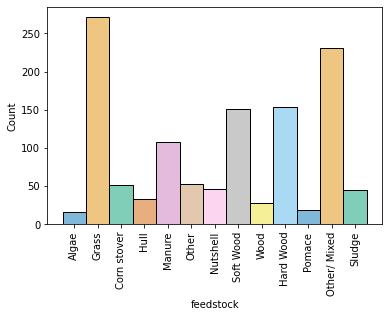

In [79]:
##seperate categorical labels from the rest of the numeric data
df_lab= pd.DataFrame(comb_df["feedstock"])

##Plot and visualize histogram counts
cateplot2= sns.histplot(data=df_lab, x='feedstock', hue= 'feedstock',
legend= False, palette= "colorblind")
plt.xticks(rotation=90)
plt.show()
##cateplot2

In [80]:
##KNN imputation
##Separate numeric columns
numeric_cols = comb_df.select_dtypes(include=['float64', 'int64']).columns

##Impute missing values using KNN imputer
knn_imputer = KNNImputer(n_neighbors=7)
data_imp_knn = pd.DataFrame(knn_imputer.fit_transform(comb_df[numeric_cols]),
                            columns= numeric_cols)

comb_df[numeric_cols]= data_imp_knn
df_imp_knn= comb_df

##Get knn data
df_knn= df_imp_knn

##Check for missing values in imputed dataset
##print(data_imputed.isnull().sum())
df_knn.info()
df_knn.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   feedstock         1207 non-null   object 
 1   ash               1207 non-null   float64
 2   c                 1207 non-null   float64
 3   n                 1207 non-null   float64
 4   h                 1207 non-null   float64
 5   o                 1207 non-null   float64
 6   ph                1207 non-null   float64
 7   delta_day14_nmin  1207 non-null   float64
 8   delta_day28_nmin  1207 non-null   float64
dtypes: float64(8), object(1)
memory usage: 85.0+ KB


,feedstock,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,Algae,32.100000,34.6,3.300000,1.50,11.680000,8.720000,13.955714,5.041429
1,Algae,47.000000,20.3,1.700000,1.50,17.354286,9.120000,13.955714,5.041429
2,Algae,73.500000,10.2,1.100000,0.80,8.071286,7.830000,13.955714,5.041429
3,Algae,16.000000,23.6,2.400000,1.30,14.591429,9.610000,13.955714,5.041429
4,Algae,46.500000,23.6,2.800000,1.50,14.468571,10.070000,13.955714,5.041429
5,Algae,20.900000,24.8,2.400000,1.20,12.282857,9.650000,13.955714,5.041429
6,Algae,54.200000,21.8,2.000000,1.20,18.400000,9.870000,13.955714,5.041429
7,Grass,6.900000,48.6,0.640000,7.25,44.100000,8.596286,4.772857,6.725714
8,Grass,19.200000,58.6,1.240000,3.47,22.700000,8.697714,5.494286,8.968571
9,Grass,9.975714,69.2,0.531429,3.20,26.600000,8.680000,4.055714,5.290000


In [81]:
##Non-Negative matrix factorization (NMF)
combtestnmf = pd.concat([dfed, subdf_repl], ignore_index=True)

##drop categorical column and add back label
dfmat= combtestnmf.drop(['feedstock'], axis=1)
dfmat.head(5)

,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,32.1,34.6,3.3,1.5,NaN,8.72,NaN,NaN
1,47.0,20.3,1.7,1.5,NaN,9.12,NaN,NaN
2,73.5,10.2,1.1,0.8,NaN,7.83,NaN,NaN
3,16.0,23.6,2.4,1.3,NaN,9.61,NaN,NaN
4,46.5,23.6,2.8,1.5,NaN,10.07,NaN,NaN


In [82]:
##fill in means for missing values to prep for NMF
dfmatfill= dfmat.fillna(dfmat.mean())
dfmatfill

,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,32.100000,34.600000,3.300000,1.500000,16.175764,8.72,9.092667,6.034667
1,47.000000,20.300000,1.700000,1.500000,16.175764,9.12,9.092667,6.034667
2,73.500000,10.200000,1.100000,0.800000,16.175764,7.83,9.092667,6.034667
3,16.000000,23.600000,2.400000,1.300000,16.175764,9.61,9.092667,6.034667
4,46.500000,23.600000,2.800000,1.500000,16.175764,10.07,9.092667,6.034667
...,...,...,...,...,...,...,...,...
1202,7.270000,71.430000,1.010000,4.640000,15.680000,8.00,3.800000,-5.130000
1203,17.215227,64.753983,1.182535,2.952729,16.175764,7.94,2.800000,0.710000
1204,10.660000,83.150000,0.980000,1.890000,3.120000,10.73,5.880000,3.540000
1205,10.330000,83.920000,1.040000,1.900000,3.760000,10.74,5.820000,1.270000


In [83]:
##NMF continued
newdf= dfmatfill
##newdf= dfmat.fillna(0)
##Impute missing values using mean imputation
##df.fillna(df.mean(), inplace=True)

# scale the data to be between 0 and 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(newdf), 
                         columns=newdf.columns)

# fill in missing values using NMF
nmf = NMF(n_components=8, ##init='random',
          init= 'nndsvd',
          random_state=1234)
X_filled = nmf.fit_transform(df_scaled)
df_imp_nmf = pd.DataFrame(np.dot(X_filled, nmf.components_), 
                          columns=newdf.columns)

# unscale the data
df_imp_nmf = pd.DataFrame(scaler.inverse_transform(df_imp_nmf), 
                          columns=newdf.columns)

# print the completed dataframe
(df_imp_nmf)

,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,32.095853,34.583165,3.299772,1.498978,16.179125,8.723474,9.090257,6.036335
1,46.995013,20.277660,1.699862,1.499053,16.178767,9.122387,9.090613,6.035538
2,73.494130,12.876020,1.100041,0.792740,16.173171,7.830838,9.100296,6.038306
3,15.996623,23.577967,2.399737,1.299088,16.179991,9.613440,9.083549,6.033196
4,46.494491,23.578274,2.799720,1.499121,16.179850,10.073890,9.086909,6.033857
...,...,...,...,...,...,...,...,...
1202,8.959473,71.446155,1.108434,4.722147,13.579757,7.178990,6.258091,-0.841806
1203,17.210045,64.760441,1.182115,2.953414,16.171283,7.943222,2.891876,0.702449
1204,10.656455,83.154245,0.979778,1.890124,3.123736,10.733815,5.859203,3.532882
1205,10.619395,83.928969,1.056842,1.914438,3.397503,10.600648,6.228878,1.997963


In [84]:
## labels for NMF
df_label_nmf = combtestnmf['feedstock']

##Concatenate the dataframes so labels appears first in df
df_nmf = pd.concat([df_label_nmf, df_imp_nmf], axis=1)

##check
df_nmf.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   feedstock         1207 non-null   object 
 1   ash               1207 non-null   float64
 2   c                 1207 non-null   float64
 3   n                 1207 non-null   float64
 4   h                 1207 non-null   float64
 5   o                 1207 non-null   float64
 6   ph                1207 non-null   float64
 7   delta_day14_nmin  1207 non-null   float64
 8   delta_day28_nmin  1207 non-null   float64
dtypes: float64(8), object(1)
memory usage: 85.0+ KB


In [97]:
##Single Value Decomposition (SVD)
##Fill missing values with column means (USe from before)
dfmat
df_filled = dfmatfill

##Perform Singular Value Decomposition
U, s, Vt = svd(df_filled, full_matrices=False)

##Diagonalize the singular values
S = np.zeros_like(df_filled.values)
S[:min(df_filled.shape), :min(df_filled.shape)] = np.diag(s)

##Set the desired rank for reconstruction
rank = 2

##Reconstruct the original dataframe
reconstructed_values = U[:, :rank].dot(S[:rank, :rank]).dot(Vt[:rank, :])
df_imp_svd = pd.DataFrame(reconstructed_values, columns=dfmatfill.columns)

##Print the original dataframe, reconstructed dataframe, and singular values
print("Original DataFrame:")
print(dfmat)
print("\nReconstructed DataFrame:")
print(df_imp_svd)
print("\nSingular values:")
print(s)


Original DataFrame:
        ash      c     n     h      o     ph  delta_day14_nmin  \
0     32.10  34.60  3.30  1.50    NaN   8.72               NaN   
1     47.00  20.30  1.70  1.50    NaN   9.12               NaN   
2     73.50  10.20  1.10  0.80    NaN   7.83               NaN   
3     16.00  23.60  2.40  1.30    NaN   9.61               NaN   
4     46.50  23.60  2.80  1.50    NaN  10.07               NaN   
...     ...    ...   ...   ...    ...    ...               ...   
1202   7.27  71.43  1.01  4.64  15.68   8.00              3.80   
1203    NaN    NaN   NaN   NaN    NaN   7.94              2.80   
1204  10.66  83.15  0.98  1.89   3.12  10.73              5.88   
1205  10.33  83.92  1.04  1.90   3.76  10.74              5.82   
1206    NaN    NaN   NaN   NaN    NaN  10.74              5.15   

      delta_day28_nmin  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
1202        

In [98]:
## labels for SVD
df_label_svd = combtestnmf['feedstock'].copy()

# Concatenate the dataframes so labels appears first in df
df_svd = pd.concat([df_label_svd, df_imp_svd], axis=1)

##check
df_svd.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   feedstock         1207 non-null   object 
 1   ash               1207 non-null   float64
 2   c                 1207 non-null   float64
 3   n                 1207 non-null   float64
 4   h                 1207 non-null   float64
 5   o                 1207 non-null   float64
 6   ph                1207 non-null   float64
 7   delta_day14_nmin  1207 non-null   float64
 8   delta_day28_nmin  1207 non-null   float64
dtypes: float64(8), object(1)
memory usage: 85.0+ KB


In [99]:
df_svd

,feedstock,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,Algae,33.108396,35.252439,1.299842,2.112479,13.873329,7.785859,7.680479,5.038648
1,Algae,47.533729,20.655182,1.600046,2.006298,15.048597,8.483561,8.184342,5.327656
2,Algae,72.041315,9.215610,2.228762,2.283741,19.216919,10.870641,10.308077,6.668844
3,Algae,19.245344,25.771899,0.802486,1.408897,8.922613,5.000744,4.965562,3.264895
4,Algae,47.019348,23.927445,1.613788,2.104384,15.453975,8.706201,8.427483,5.492461
...,...,...,...,...,...,...,...,...,...
1202,Hard Wood,6.681258,70.958507,0.829507,2.614190,13.177301,7.313979,7.607971,5.079619
1203,Hard Wood,16.504560,64.205297,1.062253,2.651104,14.495690,8.075781,8.253513,5.479246
1204,Hard Wood,7.488160,80.989666,0.942671,2.979990,15.006285,8.328750,8.665465,5.786090
1205,Hard Wood,7.108376,81.707443,0.937730,2.994213,15.029547,8.340377,8.683841,5.799701


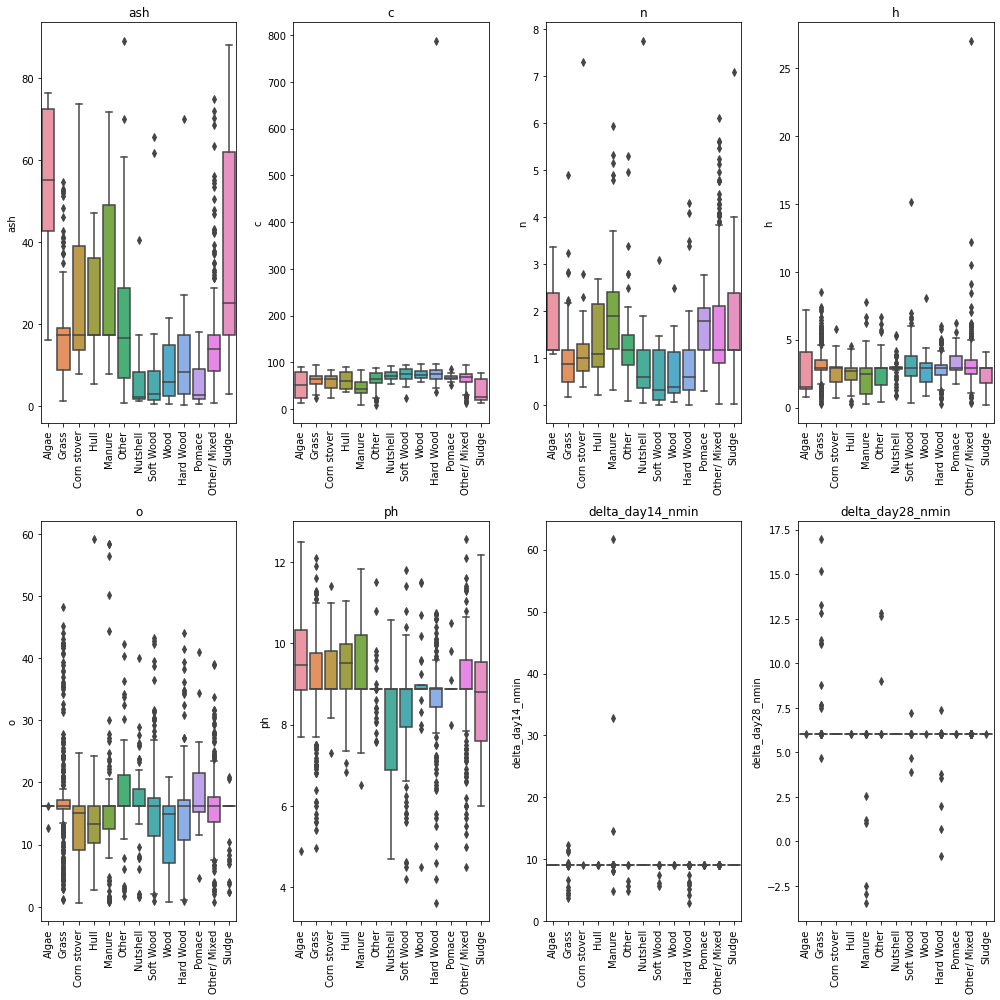

In [145]:
##Plot and visualize histogram of each column in the dataframe
##dfhistimp= df_imputed.hist(bins=10, figsize= (10,10))
##print(dfhistimp)
##dfimp2= df_imputed
##dfimp2['feedstock']= combtest['feedstock']

##dfimp2= df_imp_knn
dfimp2= df_nmf.copy()

# Set up the figure and axis grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 14))
axes = axes.flatten()

##plt.xticks(rotation=45)
# Loop through each column and plot a boxplot
for i, col in enumerate(dfimp2.loc[:,dfimp2.columns[1:]]):
    sns.boxplot(x='feedstock', y=col, data=dfimp2, ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
    axes[i].set_title(col)
        
plt.tight_layout()
plt.show()

In [101]:
## Define function for plotting net N minerlization for 14 and 28 days

def plot_N_min(df, method):
    ##set colorblind palette
    colors = sns.color_palette("colorblind")

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize= (10,5))

    # Plot the first bar plot on the left subplot using seaborn
    sns.barplot(data= df, x= "feedstock", y= "delta_day14_nmin", ax=axs[0], palette= colors)
    axs[0].set_title(f'{method} delta_day14_nmin')
    axs[0].tick_params(axis='x', rotation=45)

    # Plot the second bar plot on the right subplot using seaborn
    sns.barplot(data= df, x= "feedstock", y= "delta_day28_nmin", ax=axs[1], palette= colors)
    axs[1].set_title(f'{method} delta_day28_nmin')
    axs[1].tick_params(axis='x', rotation=45)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

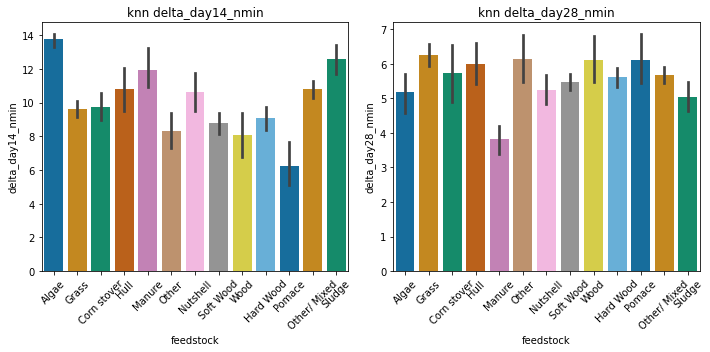

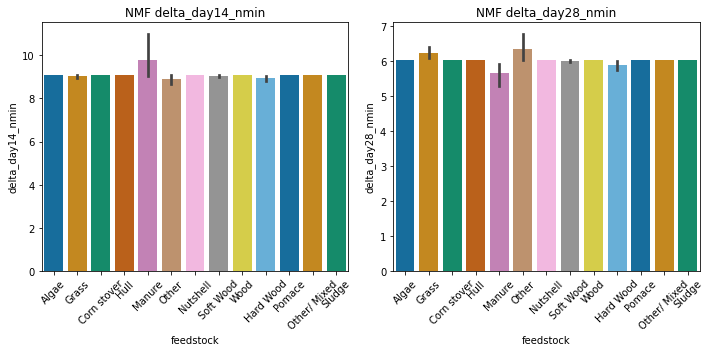

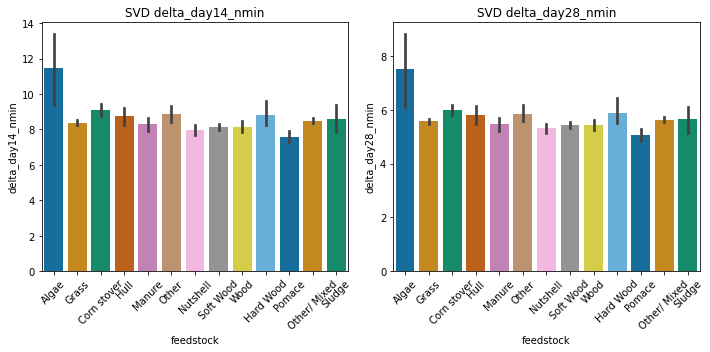

In [103]:
plot_N_min(df_knn, "knn")
plot_N_min(df_nmf, "NMF")
plot_N_min(df_svd, "SVD")

In [104]:
##df_named = df.rename(columns={'feedstock_composition': 'feedstock', 'total_ash_content_': 'ash',
  ##                      'total_c_used_in_plot': 'c', 'total_n_': 'n',
    ##                    'h_': 'h', 'o_': 'o',
      ##                  'ph': 'ph' })

## select certain columns
##df_imp= df_imputed[['ash', 'c', 'n', 
##              'h', 'o', 'ph', 'delta_day14_nmin','delta_day28_nmin']]
##df.columns

In [105]:
dfimp2.columns[:-2]

Index(['feedstock', 'ash', 'c', 'n', 'h', 'o', 'ph'], dtype='object')

In [41]:
##Extra ##View clusters using kmeans to see if there are similar grouped biochars

def makeclusters(df_imp, clusters):
    # read the dataset into a pandas DataFrame
    df_k= df_imp.copy()

    # extract the numeric columns for clustering
    ##numeric_cols = ['numeric_col1', 'numeric_col2', 'numeric_col3', 'numeric_col4', 'numeric_col5', 'numeric_col6']
    ##X = df[numeric_cols].values
    knn_nolabs= df_k.drop(['feedstock'], axis=1).values
    X= knn_nolabs ##.values

    # scale the numeric columns to have mean=0 and variance=1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # perform KMeans clustering with 4 clusters
    kmeans = KMeans(n_clusters= clusters, random_state=1234)
    kmeans.fit(X_scaled)

    # add the cluster labels to the original dataset
    df_k['cluster'] = kmeans.labels_
    df_k['feedstock'] = combtest['feedstock']

    # print the cluster labels for each class
    print(df_k.groupby(['feedstock','cluster']).size().unstack(fill_value=0))
    ##df_k.head(5)


In [106]:
##View clusters using kmeans to see if there are similar grouped biochars

def makeclusters(df_imp, clusters):
    # read the dataset into a pandas DataFrame
    df_k = df_imp.copy()
    feedlabel =df_imp['feedstock']

    # extract the numeric columns for clustering
    knn_nolabs = df_k.drop(['feedstock'], axis=1).values
    X = knn_nolabs

    # scale the numeric columns to have mean=0 and variance=1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # perform KMeans clustering with the specified number of clusters
    kmeans = KMeans(n_clusters=clusters, random_state=1234)
    kmeans.fit(X_scaled)

    # add the cluster labels to the original dataset
    df_k['cluster'] = kmeans.labels_
    ##df_k['feedstock'] = combtest['feedstock']
    df_k['feedstock'] = feedlabel

    # calculate the percentage of values in each cluster for each feedstock
    cluster_counts = df_k.groupby(['feedstock', 'cluster']).size().unstack(fill_value=0)
    cluster_percentages = cluster_counts.apply(lambda x: round((x / x.sum()) * 100, 2), axis=1)

    # print the percentage of values in each cluster for each feedstock
    print(cluster_percentages)


In [107]:
makeclusters(df_knn, 3)

cluster           0      1      2
feedstock                        
Algae         12.50  87.50   0.00
Corn stover    9.62  36.54  53.85
Grass         40.22  14.76  45.02
Hard Wood     36.36   4.55  59.09
Hull          15.15  24.24  60.61
Manure         6.48  78.70  14.81
Nutshell      52.17   6.52  41.30
Other         26.42  28.30  45.28
Other/ Mixed  26.84  29.44  43.72
Pomace        31.58   0.00  68.42
Sludge        11.11  77.78  11.11
Soft Wood     49.67   1.32  49.01
Wood          28.57   0.00  71.43


In [108]:
makeclusters(df_nmf, 3)

cluster           0     1      2
feedstock                       
Algae         87.50  0.00  12.50
Corn stover   55.77  0.00  44.23
Grass         26.57  0.00  73.43
Hard Wood      5.19  0.00  94.81
Hull          60.61  0.00  39.39
Manure        82.41  1.85  15.74
Nutshell       4.35  0.00  95.65
Other         39.62  0.00  60.38
Other/ Mixed  35.50  0.00  64.50
Pomace        15.79  0.00  84.21
Sludge        73.33  0.00  26.67
Soft Wood      3.97  0.00  96.03
Wood          10.71  0.00  89.29


In [109]:
makeclusters(df_svd, 3)

cluster            0     1      2
feedstock                        
Algae          25.00  0.00  75.00
Corn stover    71.15  0.00  28.85
Grass          91.51  0.00   8.49
Hard Wood      98.05  0.65   1.30
Hull           78.79  0.00  21.21
Manure         63.89  0.00  36.11
Nutshell       97.83  0.00   2.17
Other          73.58  0.00  26.42
Other/ Mixed   90.91  0.00   9.09
Pomace        100.00  0.00   0.00
Sludge         51.11  0.00  48.89
Soft Wood      98.68  0.00   1.32
Wood          100.00  0.00   0.00


In [111]:
df_knn.head(10)

,feedstock,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,Algae,32.100000,34.6,3.300000,1.50,11.680000,8.720000,13.955714,5.041429
1,Algae,47.000000,20.3,1.700000,1.50,17.354286,9.120000,13.955714,5.041429
2,Algae,73.500000,10.2,1.100000,0.80,8.071286,7.830000,13.955714,5.041429
3,Algae,16.000000,23.6,2.400000,1.30,14.591429,9.610000,13.955714,5.041429
4,Algae,46.500000,23.6,2.800000,1.50,14.468571,10.070000,13.955714,5.041429
5,Algae,20.900000,24.8,2.400000,1.20,12.282857,9.650000,13.955714,5.041429
6,Algae,54.200000,21.8,2.000000,1.20,18.400000,9.870000,13.955714,5.041429
7,Grass,6.900000,48.6,0.640000,7.25,44.100000,8.596286,4.772857,6.725714
8,Grass,19.200000,58.6,1.240000,3.47,22.700000,8.697714,5.494286,8.968571
9,Grass,9.975714,69.2,0.531429,3.20,26.600000,8.680000,4.055714,5.290000


In [112]:
##seperate categorical labels from the rest of the numeric data
df_feed= df_knn.drop(['feedstock'], axis=1)
df_feed.head(3)

,ash,c,n,h,o,ph,delta_day14_nmin,delta_day28_nmin
0,32.1,34.6,3.3,1.5,11.680000,8.72,13.955714,5.041429
1,47.0,20.3,1.7,1.5,17.354286,9.12,13.955714,5.041429
2,73.5,10.2,1.1,0.8,8.071286,7.83,13.955714,5.041429


In [113]:
## Time to scale for visualizing clusters using the df_knn imputation method
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_feed)
## normalize to gaussian dist and convert to pandas Df
df_norm = pd.DataFrame(normalize(df_scaled))
## View to check if scaled correctly
df_norm

,0,1,2,3,4,5,6,7
0,0.316929,-0.382362,0.709937,-0.319598,-0.191791,-0.011121,0.318969,-0.092480
1,0.635325,-0.575384,0.180128,-0.326681,0.034477,0.098505,0.326038,-0.094530
2,0.761036,-0.451670,-0.015649,-0.307362,-0.219295,-0.163735,0.208666,-0.060500
3,-0.014220,-0.606251,0.476542,-0.421645,-0.088485,0.265235,0.370988,-0.107563
4,0.539693,-0.460165,0.479505,-0.282147,-0.071474,0.310451,0.281593,-0.081644
...,...,...,...,...,...,...,...,...
1202,-0.100640,0.043611,-0.028466,0.186990,-0.017316,-0.107974,-0.261740,-0.933664
1203,-0.150244,0.105555,0.212130,0.114825,0.142971,-0.204788,-0.534613,-0.748272
1204,-0.126953,0.241162,-0.066875,-0.246685,-0.556340,0.553220,-0.344123,-0.355543
1205,-0.112755,0.211469,-0.038658,-0.205673,-0.445726,0.467846,-0.293783,-0.628420


In [114]:
df_scaled

array([[ 0.90841422, -1.09596581,  2.0348954 , ..., -0.03187699,
         0.91426311, -0.26507691],
       [ 1.78155221, -1.61346679,  0.50510702, ...,  0.27622283,
         0.91426311, -0.26507691],
       [ 3.33444864, -1.97897447, -0.06856363, ..., -0.71739909,
         0.91426311, -0.26507691],
       ...,
       [-0.34796689,  0.66100429, -0.18329776, ...,  1.51632461,
        -0.94320994, -0.97451238],
       [-0.36730484,  0.68886973, -0.12593069, ...,  1.5240271 ,
        -0.95701038, -2.0471032 ],
       [ 1.31275329, -0.58068786,  0.99409294, ...,  1.5240271 ,
        -1.11111525, -0.85638564]])

In [115]:
##Determine number of components
pca = PCA(n_components = 2, random_state=1234)
df_pc = pd.DataFrame(pca.fit_transform(df_norm))
df_pc.columns = ['pc1', 'pc2']
##check first and last 3 rows
print(df_pc.head(3)), print(df_pc.tail(3))
print("dimesions of pca df are:", df_pc.shape)

        pc1       pc2
0  0.864851 -0.114919
1  0.895168 -0.009042
2  0.704555 -0.090203
           pc1       pc2
1204  0.034659 -0.598649
1205  0.106786 -0.347984
1206  0.524770 -0.457063
dimesions of pca df are: (1207, 2)


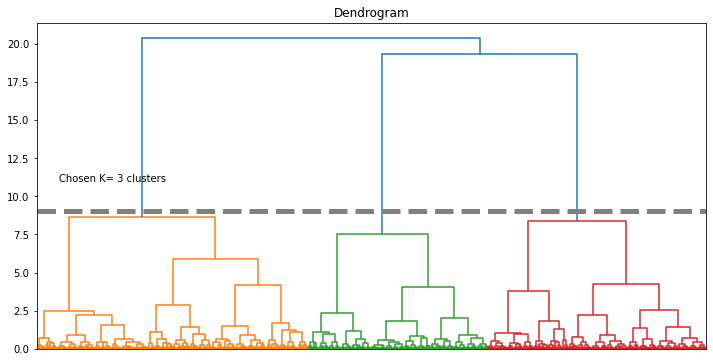

In [116]:
plt.figure(figsize =(12, 6))
plt.title('Dendrogram')
Dendrogram = shc.dendrogram((shc.linkage(df_pc, method ='ward')))
choose_max_dist= 9
##plt.xticks(rotation = 90)
plt.tick_params(labelbottom = False, bottom = False)
plt.text(400, 11, "Chosen K= 3 clusters")
plt.axhline(y=choose_max_dist, color='gray', ls='--', lw=5)

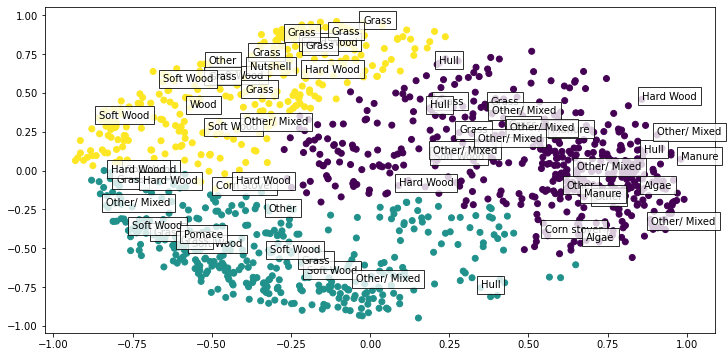

In [117]:
## Code to create incremental list to annotate every 100th row with a class ("home_team_co
def outagglo(datcol,nclusts):
    def range_inc(start, stop, step, inc):
        i = start
        while i < stop:
            yield i
            i += step
            step += inc
    listforlabs= list(range_inc(0,round(len(datcol),-2), 20,0))
    
    ac6 = AgglomerativeClustering(n_clusters = nclusts)
    # Visualizing the clustering
    plt.figure(figsize =(12, 6))
    plt.scatter(df_pc['pc1'], df_pc['pc2'], c = ac6.fit_predict(df_pc), cmap ='viridis')
    for i in listforlabs:
        plt.text(x= df_pc['pc1'][i],
                 y= df_pc['pc2'][i],
                 ##s= list(dflab_hcont['home_team_continent'])[i],
                 s= list(datcol)[i],
                 fontdict=dict(color='black',size=10),
                 bbox=dict(facecolor='white',alpha=0.8))
    plt.show()

outagglo(df_lab['feedstock'],3)

In [147]:
##Functions for cross valudation regression and classification using 10-fold
data = df_knn
X_knn_reg = data.drop(['feedstock','delta_day28_nmin'], axis=1)
y_knn_reg = data['delta_day28_nmin']
X_knn_class = data.drop('feedstock', axis=1)
y_knn_class = data['feedstock']

data2 = df_nmf
X_nmf_reg = data2.drop(['feedstock','delta_day28_nmin'], axis=1)
y_nmf_reg = data2['delta_day28_nmin']
X_nmf_class = data2.drop('feedstock', axis=1)
y_nmf_class = data2['feedstock']

data3 = df_svd
X_svd_reg = data3.drop(['feedstock','delta_day28_nmin'], axis=1)
y_svd_reg = data3['delta_day28_nmin']
X_svd_class = data3.drop('feedstock', axis=1)
y_svd_class = data3['feedstock']

def cross_val_regress(X, y, imp_method, kfolds):
    # Define model types
    regressors = [LinearRegression(), AdaBoostRegressor(), GradientBoostingRegressor(), RandomForestRegressor()]
    # Perform 5-fold cross-validation on each dataset for each classifier
    kf = KFold(n_splits= kfolds, shuffle=True, random_state=123)
    results = pd.DataFrame(columns=["Model", "Type", "Metric", "Value"])
    for model in regressors:
        cv_results = cross_validate(model, X, y, cv=kf, scoring=["neg_mean_squared_error", "r2"])
        rmse = np.sqrt(-cv_results["test_neg_mean_squared_error"]).mean()
        r2 = cv_results["test_r2"].mean()
        results = results.append(pd.DataFrame({"Model": [type(model).__name__]*2, 
                                               "Type": ["Regression"]*2, 
                                               "Metric": ["RMSE", "R2"], 
                                               "Value": [rmse, r2]}))
    results['Impute_method']= new_col = [imp_method]*len(results)
    # Move the last column to the front
    last_col = results.pop(results.columns[-1])
    results.insert(0, last_col.name, last_col)
    return(results)

def cross_val_class(X, y, imp_method, kfolds):
    # Define model types
    classifiers = [KNeighborsClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), RandomForestClassifier()]
    # Perform 5-fold cross-validation on each dataset for each classifier
    kf = KFold(n_splits= kfolds, shuffle=True, random_state=123)
    results = pd.DataFrame(columns=["Model", "Type", "Metric", "Value"])
    for model in classifiers:
        cv_results = cross_validate(model, X, y, cv=kf, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"])
        accuracy = cv_results["test_accuracy"].mean()
        precision = cv_results["test_precision_macro"].mean()
        recall = cv_results["test_recall_macro"].mean()
        f1 = cv_results["test_f1_macro"].mean()
        results = results.append(pd.DataFrame({"Model": [type(model).__name__]*4, 
                                               "Type": ["Classification"]*4, 
                                               "Metric": ["Accuracy", "Precision", "Recall", "F1-score"], 
                                               "Value": [accuracy, precision, recall, f1]}))
    results['Impute_method']= new_col = [imp_method]*len(results)
    # Move the last column to the front
    last_col = results.pop(results.columns[-1])
    results.insert(0, last_col.name, last_col)
    return(results)

In [135]:
cvr= cross_val_regress(X=X_knn_reg, y=y_knn_reg, imp_method= "knn", kfolds=10)
cvr

,Impute_method,Model,Type,Metric,Value
0,knn,LinearRegression,Regression,RMSE,2.018255
1,knn,LinearRegression,Regression,R2,0.014814
0,knn,AdaBoostRegressor,Regression,RMSE,1.580579
1,knn,AdaBoostRegressor,Regression,R2,0.413868
0,knn,GradientBoostingRegressor,Regression,RMSE,1.133032
1,knn,GradientBoostingRegressor,Regression,R2,0.701442
0,knn,RandomForestRegressor,Regression,RMSE,1.091291
1,knn,RandomForestRegressor,Regression,R2,0.714743


In [136]:
cvc= cross_val_class(X=X_knn_class, y=y_knn_class, imp_method= "knn", kfolds=10)
cvc

,Impute_method,Model,Type,Metric,Value
0,knn,KNeighborsClassifier,Classification,Accuracy,0.375448
1,knn,KNeighborsClassifier,Classification,Precision,0.282250
2,knn,KNeighborsClassifier,Classification,Recall,0.271566
3,knn,KNeighborsClassifier,Classification,F1-score,0.253886
0,knn,AdaBoostClassifier,Classification,Accuracy,0.315640
1,knn,AdaBoostClassifier,Classification,Precision,0.101301
2,knn,AdaBoostClassifier,Classification,Recall,0.167064
3,knn,AdaBoostClassifier,Classification,F1-score,0.115628
0,knn,GradientBoostingClassifier,Classification,Accuracy,0.476446
1,knn,GradientBoostingClassifier,Classification,Precision,0.439315


In [146]:
cvr2= cross_val_regress(X=X_nmf_reg, y=y_nmf_reg, imp_method= "nmf", kfolds=10)
cvr2

,Impute_method,Model,Type,Metric,Value
0,nmf,LinearRegression,Regression,RMSE,0.745653
1,nmf,LinearRegression,Regression,R2,0.046452
0,nmf,AdaBoostRegressor,Regression,RMSE,0.798571
1,nmf,AdaBoostRegressor,Regression,R2,-0.759140
0,nmf,GradientBoostingRegressor,Regression,RMSE,0.546072
1,nmf,GradientBoostingRegressor,Regression,R2,0.088821
0,nmf,RandomForestRegressor,Regression,RMSE,0.654234
1,nmf,RandomForestRegressor,Regression,R2,0.202928


In [138]:
cvc2= cross_val_class(X=X_nmf_class, y=y_nmf_class, imp_method= "nmf", kfolds=10)
cvc2

,Impute_method,Model,Type,Metric,Value
0,nmf,KNeighborsClassifier,Classification,Accuracy,0.380379
1,nmf,KNeighborsClassifier,Classification,Precision,0.304696
2,nmf,KNeighborsClassifier,Classification,Recall,0.282870
3,nmf,KNeighborsClassifier,Classification,F1-score,0.273269
0,nmf,AdaBoostClassifier,Classification,Accuracy,0.311481
1,nmf,AdaBoostClassifier,Classification,Precision,0.091256
2,nmf,AdaBoostClassifier,Classification,Recall,0.159363
3,nmf,AdaBoostClassifier,Classification,F1-score,0.109668
0,nmf,GradientBoostingClassifier,Classification,Accuracy,0.482252
1,nmf,GradientBoostingClassifier,Classification,Precision,0.408333


In [139]:
cvr3= cross_val_regress(X=X_svd_reg, y=y_svd_reg, imp_method= "svd", kfolds=10)
cvr3

,Impute_method,Model,Type,Metric,Value
0,svd,LinearRegression,Regression,RMSE,1.135641e-15
1,svd,LinearRegression,Regression,R2,1.000000e+00
0,svd,AdaBoostRegressor,Regression,RMSE,5.257408e-01
1,svd,AdaBoostRegressor,Regression,R2,8.708559e-01
0,svd,GradientBoostingRegressor,Regression,RMSE,3.351170e-01
1,svd,GradientBoostingRegressor,Regression,R2,9.300619e-01
0,svd,RandomForestRegressor,Regression,RMSE,3.334374e-01
1,svd,RandomForestRegressor,Regression,R2,9.290720e-01


In [140]:
cvc3= cross_val_class(X=X_svd_class, y=y_svd_class, imp_method= "svd", kfolds=10)
cvc3

,Impute_method,Model,Type,Metric,Value
0,svd,KNeighborsClassifier,Classification,Accuracy,0.331426
1,svd,KNeighborsClassifier,Classification,Precision,0.226989
2,svd,KNeighborsClassifier,Classification,Recall,0.227309
3,svd,KNeighborsClassifier,Classification,F1-score,0.210016
0,svd,AdaBoostClassifier,Classification,Accuracy,0.287500
1,svd,AdaBoostClassifier,Classification,Precision,0.087254
2,svd,AdaBoostClassifier,Classification,Recall,0.148785
3,svd,AdaBoostClassifier,Classification,F1-score,0.102339
0,svd,GradientBoostingClassifier,Classification,Accuracy,0.336350
1,svd,GradientBoostingClassifier,Classification,Precision,0.240704


In [148]:
allreg = pd.concat([cvr, cvr2, cvr3], ignore_index=True)
allclass = pd.concat([cvc, cvc2, cvc3], ignore_index=True)
##all_cv_res = pd.concat([allknn, allnmf], ignore_index=True)
##all_cv_res

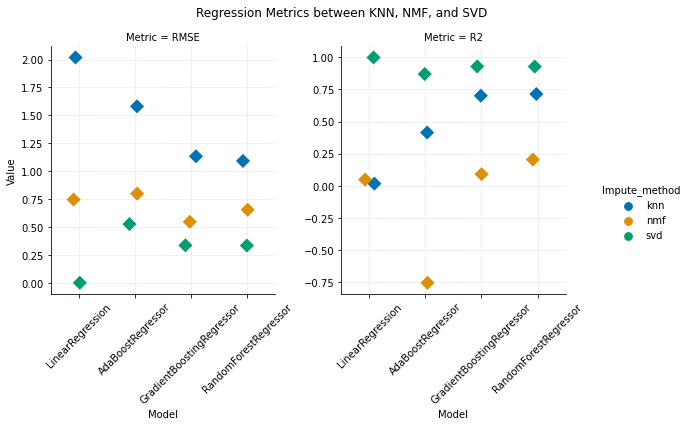

In [149]:
##color set
color_pal = 'colorblind'

# Create a bar plot with grouping, hue mapping, and facets
p= sns.catplot(data= allreg, x='Model', y='Value', hue='Impute_method', 
            col='Metric', kind='strip', marker='D', s=10,##kind='bar', 
            sharey='col', palette= color_pal, height=6, aspect=0.7)

p.set_xticklabels(rotation=45)

# Add major gridlines to each subplot
for ax in p.axes.flat:
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add plot title
p.fig.suptitle('Regression Metrics between KNN, NMF, and SVD')

# Adjust the spacing between plots
p.tight_layout()

# Show the plot
plt.show()

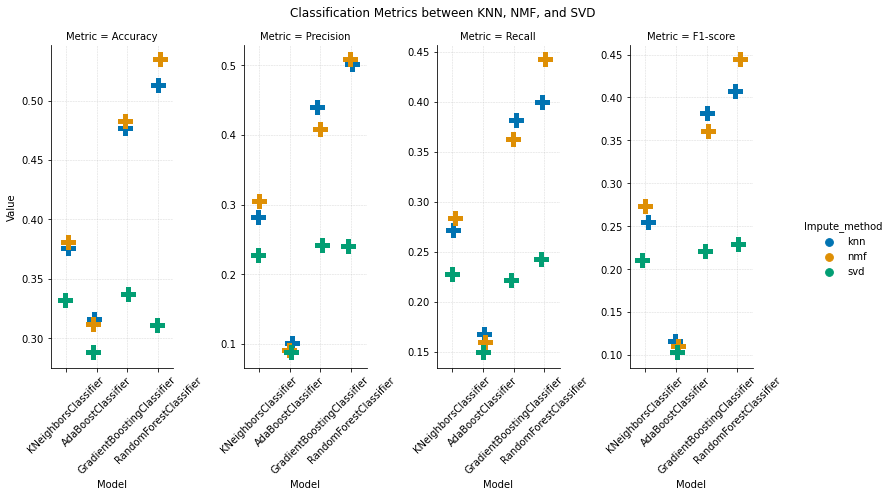

In [150]:
##color set
color_pal = 'colorblind'

##Create a bar plot with grouping, hue mapping, and facets
p= sns.catplot(data= allclass, x='Model', y='Value', hue='Impute_method', 
            col='Metric', kind='strip', marker='P', s=15,##kind='bar',
            sharey='col', palette= color_pal, height=7, aspect=0.4)

p.set_xticklabels(rotation=45)

# Add major gridlines to each subplot
for ax in p.axes.flat:
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add plot titles
p.fig.suptitle('Classification Metrics between KNN, NMF, and SVD')

# Adjust the spacing between plots
p.tight_layout()

# Show the plot
plt.show()

<AxesSubplot:xlabel='Metric', ylabel='Value'>

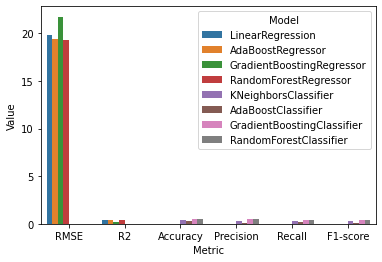

In [352]:
sns.barplot(data=allknn, x='Metric', y='Value', hue='Model')

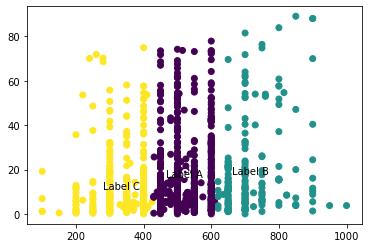

In [85]:
##Extra

plt.scatter(data_imputed.iloc[:,0], data_imputed.iloc[:,1], c=labels)

# Add text labels to each data point
unique_labels = np.unique(labels)
for label in unique_labels:
    xy = data_imputed.loc[labels == label, [0, 1]].mean()
    plt.annotate(str(label), xy=xy, ha='center', va='center', fontsize=12, fontweight='bold', color='white')

    # Add unique text labels to each data point
    text_labels = ['Label A', 'Label B', 'Label C']
    plt.annotate(text_labels[label], xy=xy, ha='center', va='center', fontsize=10, color='black')

plt.show()